<a href="https://colab.research.google.com/github/harshil07cric/SMS-Spam-filtering/blob/main/SMS_spam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
import sklearn.metrics as m

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
sent=dataset.iloc[:,[1]]['v2']

In [ ]:
sent

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
labels=dataset.iloc[:,[0]]['v1']
labels

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
labels=le.fit_transform(labels)

In [ ]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [ ]:
labels

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from keras.utils import to_categorical
labels=to_categorical(labels)

In [ ]:
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
import re

In [ ]:
lemma=WordNetLemmatizer()

In [ ]:
sentences=[]
for j in range(0,len(sent)):
  s=re.sub('[^A-Za-z]',' ',sent[j])
  s=s.lower()
  words=word_tokenize(s)
  words=[lemma.lemmatize(i) for i in words if i not in stopwords.words('english')]
  s=' '.join(words)
  sentences.append(s)

In [ ]:
sentences

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gon na home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw

In [ ]:
from keras.preprocessing.text import one_hot

In [ ]:
one_hot_sent=[one_hot(i,10000) for i in sentences]

In [ ]:
maxi=[len(i) for i in one_hot_sent]

In [ ]:
max(maxi)

77

In [ ]:
from keras.preprocessing.sequence import  pad_sequences

In [ ]:
padsequences=pad_sequences(one_hot_sent,maxlen=80)

In [ ]:
padsequences

array([[   0,    0,    0, ...,  941, 9000, 3789],
       [   0,    0,    0, ...,  768, 1095, 2699],
       [   0,    0,    0, ..., 6995, 2470, 7103],
       ...,
       [   0,    0,    0, ...,  259, 4929, 3454],
       [   0,    0,    0, ..., 7068, 1095, 2951],
       [   0,    0,    0, ..., 5490, 3765, 1327]], dtype=int32)

In [ ]:
feature_train,feature_test,label_train,label_test=train_test_split(padsequences,labels,test_size=0.2,random_state=7)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout,Flatten

In [ ]:
model=Sequential()
model.add(Embedding(10000,64,input_length=80))
model.add(LSTM(100))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 64)            640000    
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 706202 (2.69 MB)
Trainable params: 706202 (2.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(feature_train,label_train,epochs=20,validation_data=(feature_test,label_test))

Epoch 1/20
140/140 [==============================] - 16s 98ms/step - loss: 0.1965 - accuracy: 0.9387 - val_loss: 0.0562 - val_accuracy: 0.9857
Epoch 2/20
140/140 [==============================] - 13s 94ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0441 - val_accuracy: 0.9874
Epoch 3/20
140/140 [==============================] - 13s 91ms/step - loss: 0.0182 - accuracy: 0.9948 - val_loss: 0.0410 - val_accuracy: 0.9874
Epoch 4/20
140/140 [==============================] - 12s 83ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0447 - val_accuracy: 0.9857
Epoch 5/20
140/140 [==============================] - 12s 88ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0506 - val_accuracy: 0.9865
Epoch 6/20
140/140 [==============================] - 13s 93ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0417 - val_accuracy: 0.9839
Epoch 7/20
140/140 [==============================] - 13s 94ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0531 - val_accuracy:

In [ ]:
label_pred=model.predict(feature_test)

35/35 [==============================] - 1s 19ms/step


In [ ]:
label_pred

array([[9.9999636e-01, 2.9917667e-06],
       [9.9614060e-01, 3.6549363e-03],
       [9.9999928e-01, 5.9552252e-07],
       ...,
       [9.9925196e-01, 6.1011879e-04],
       [9.9999821e-01, 1.5142004e-06],
       [9.9999857e-01, 1.1110234e-06]], dtype=float32)

In [ ]:
label_pred_=[np.argmax(i,axis=0) for i in label_pred]

In [ ]:
label_pred_[0:5]

[0, 0, 0, 0, 0]

In [ ]:
label_test_=[np.argmax(i,axis=0) for i in label_test]

In [ ]:
label_test_[0:5]

[0, 0, 0, 0, 0]

In [ ]:
m.accuracy_score(label_test_,label_pred_)

0.9829596412556054

In [ ]:
print(m.classification_report(label_test_,label_pred_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.96      0.91      0.93       145

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
conf_matrix=m.confusion_matrix(label_test_,label_pred_)

In [ ]:
print(m.confusion_matrix(label_test_,label_pred_))

[[964   6]
 [ 13 132]]


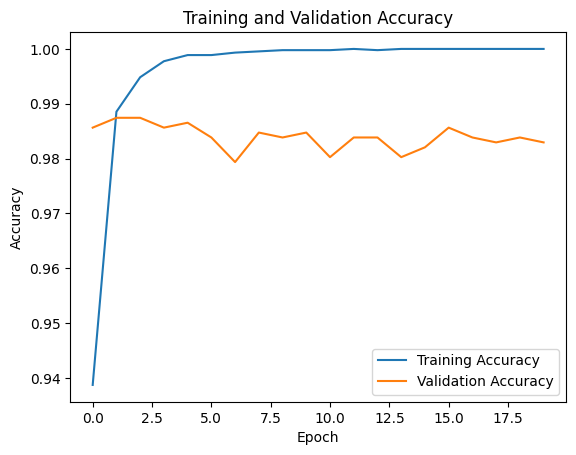

In [ ]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

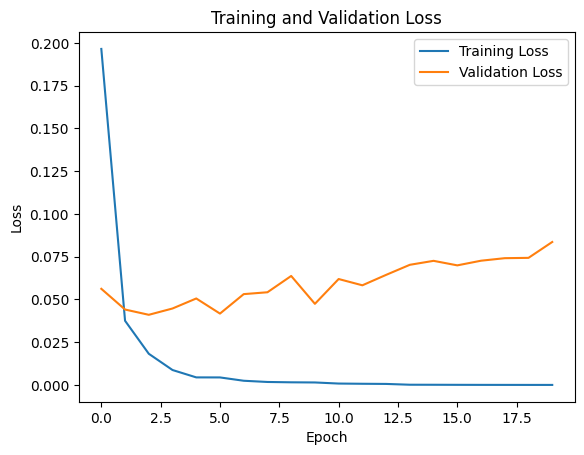

In [ ]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

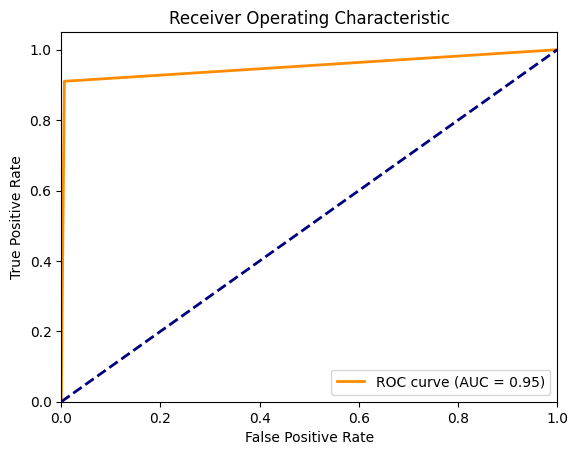

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(label_test_, label_pred_)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

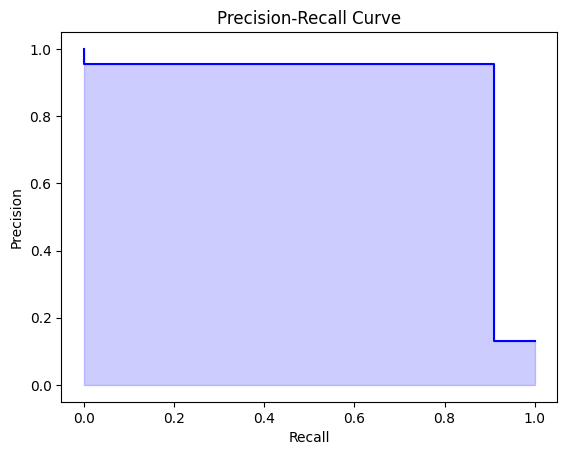

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(label_test_, label_pred_)

plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

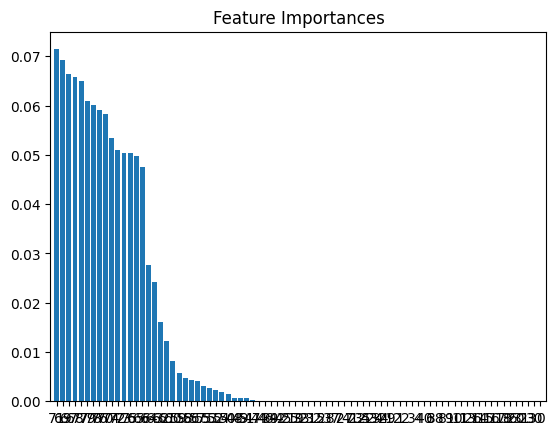

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Calculate the maximum sequence length
max_len = len(padsequences[0])

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(feature_train, label_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(max_len), importances[indices])
plt.xticks(range(max_len), indices)
plt.xlim([-1, max_len])
plt.show()


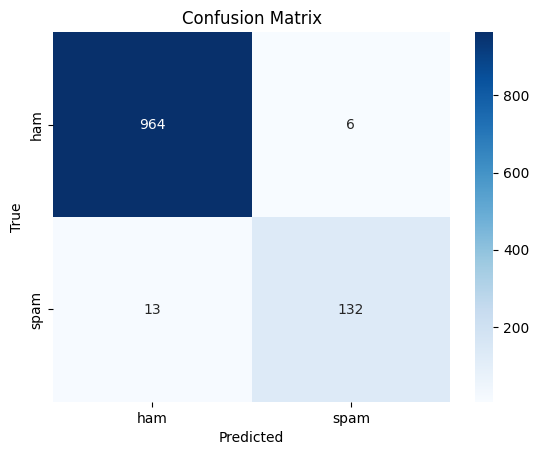

In [ ]:
import seaborn as sns

# Generate a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


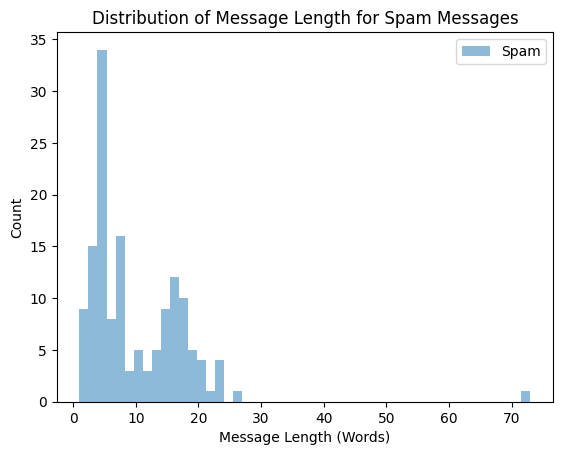

In [ ]:
spam_lengths = []
min_length = min(len(sentences), len(label_test_))

for i in range(min_length):
    if label_test_[i] == 1:
        spam_lengths.append(len(sentences[i].split()))

# Plot the distribution of message length for spam and non-spam
if spam_lengths:
    plt.hist(spam_lengths, bins=50, label='Spam', alpha=0.5)
    plt.xlabel('Message Length (Words)')
    plt.ylabel('Count')
    plt.legend()
    plt.title('Distribution of Message Length for Spam Messages')
    plt.show()
else:
    print("No spam messages found in the test set.")


In [ ]:
from tensorflow.keras.models import save_model

In [ ]:
save_model(model, 'sms_spam.h5')

<ipython-input-59-d884c670467f>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'sms_spam.h5')
